# Plotting Overview

## Getting started

`scipp` offers a number of different ways to plot data from a `DataArray` or a `Dataset`.
It uses the `matplotlib` graphing library to do so, as well as the `ipyvolume` project for 3D visualizations.

In [1]:
import numpy as np
import scipp as sc

In [2]:
N = 20
M = 5
d = sc.Dataset()
d.coords['x'] = sc.Variable(['x'], values=np.arange(M), unit=sc.units.m)
d.coords['y'] = sc.Variable(['y'], values=np.arange(N), unit=sc.units.us)

d['data'] = sc.Variable(['y'],
                        values=100*np.random.rand(N)+50,
                        unit=sc.units.counts)
d['data_with_errors'] = sc.Variable(['y'],
                                    values=50*np.random.rand(N) + 20.,
                                    variances=50*np.random.rand(N),
                                    unit=sc.units.counts)

d['data_2d'] = sc.Variable(['x', 'y'],
                           values=10.0*np.random.rand(M, N),
                           unit=sc.units.K)

Plotting functionality is available in the `scipp.plot` module, with the `plot` function.
The information in a data array or dataset is typically enough to create meaningful plots:

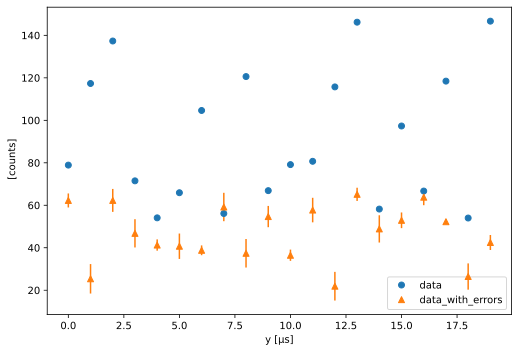

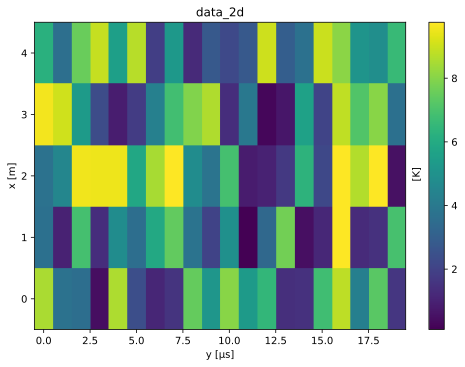

In [3]:
from scipp.plot import plot

plot(d)

## Plotting slices or items of a dataset

The usual indexing and slicing can be used to create plots of slices of data, or plots of individual items from a dataset.

### Plot a single entry of a dataset

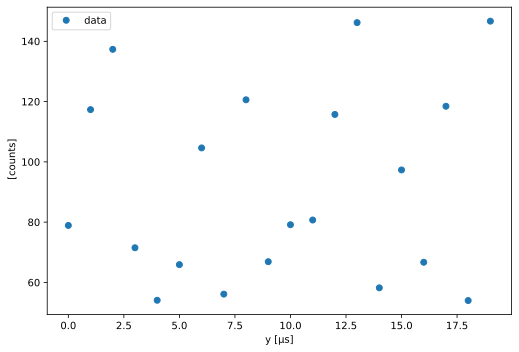

In [4]:
plot(d['data'])

### Plot a slice range

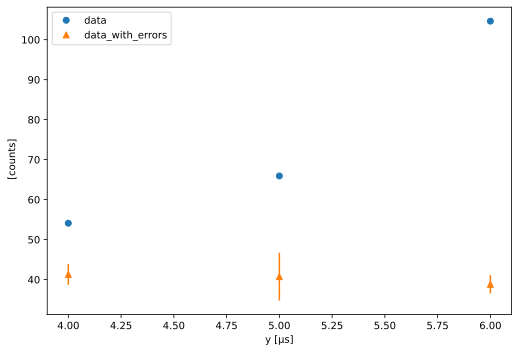

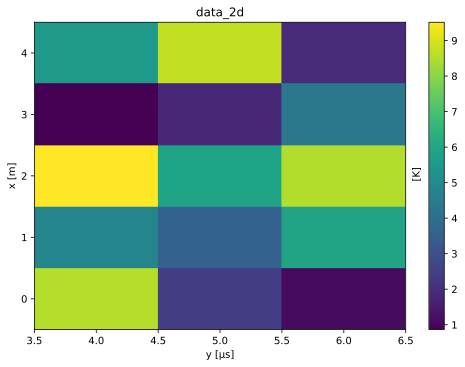

In [5]:
plot(d['y', 4:7])

### Plot a 1-D slice of 2-D data

When slicing without a range, the dimensionality reduces.
This can be used to, e.g., plot a 1-D slice through 2-D data:

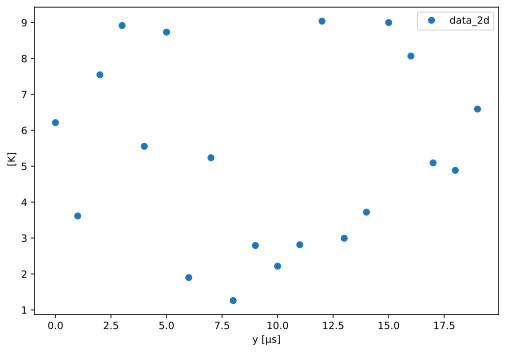

In [6]:
plot(d['x', 4])

## Logarithmic scale

1-D data can be plotted on a logarithmic scale on one or both axes:

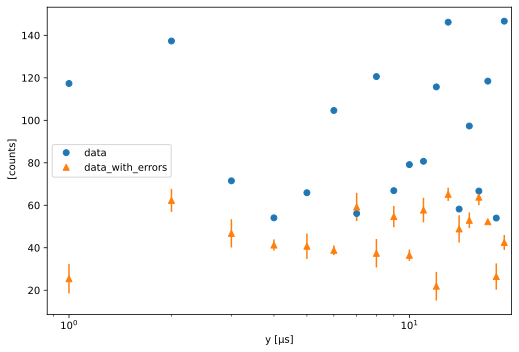

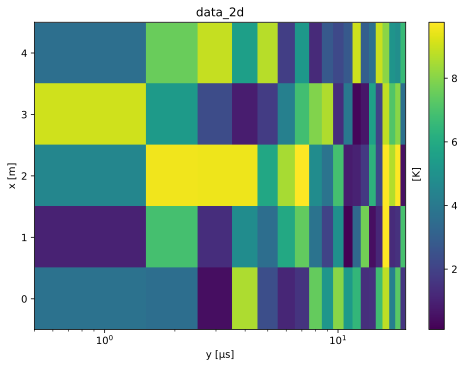

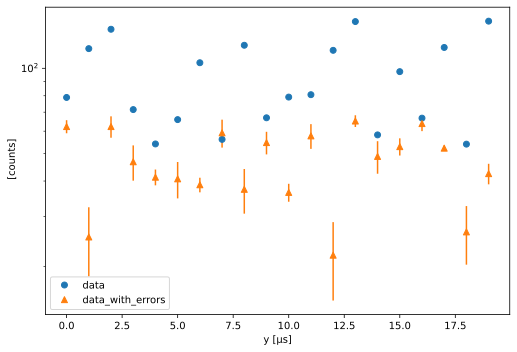

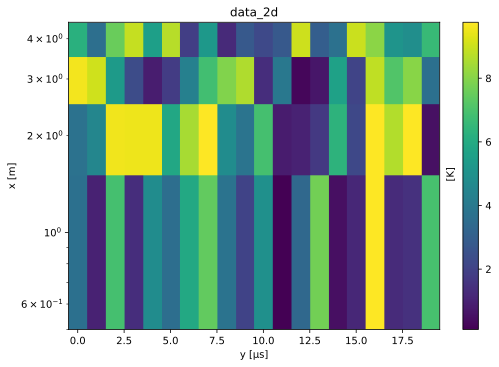

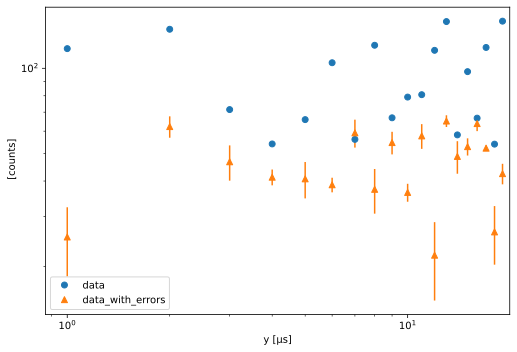

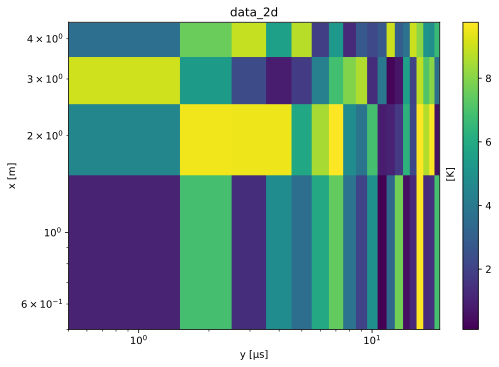

In [7]:
plot(d, logx=True)
plot(d, logy=True)
plot(d, logxy=True)

## Axis labels and axis order

By default scipp uses coordinate values to label the axes.
If a data array or dataset contains auxiliary coordinates (accessed using the `labels` property), these can be used instead.
This is configured using the `axes` keyword argument of `plot`.
It accepts a list of dimension labels and names.
The former refers to coordinates, while the latter refers to labels.
The order in the list also defines the axis order for multi-dimensional plots:

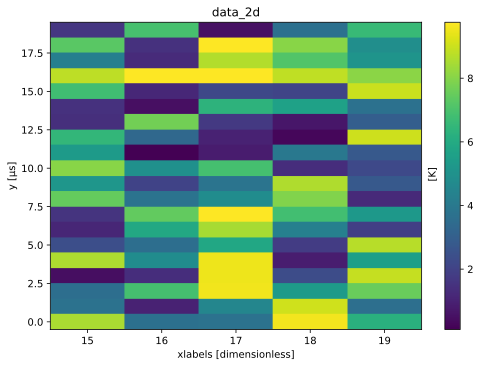

In [8]:
d.coords['xlabels'] = sc.Variable(['x'], values=np.arange(M) + 15.)
plot(d['data_2d'], axes=['y', 'xlabels'])

## Sparse data

By default, sparse data is plotted as a scatter plot.
In many cases, on-the-fly histogramming is more useful.
This can be configured using the `bins` keyword argument:

In [9]:
N = 50
M = 10
var = sc.Variable(dims=['x'],
                  shape=[M],
                  dtype=sc.dtype.event_list_float64,
                  unit=sc.units.us)
dat = sc.Variable(dims=['x'],
                  values=np.ones(M),
                  variances=np.ones(M),
                  unit=sc.units.counts)
for i in range(M):
    v = np.random.normal(50.0, scale=20.0, size=int(np.random.rand()*N))
    var['x', i].values = v

d = sc.Dataset()
d.coords['x'] = sc.Variable(['x'], values=np.arange(M), unit=sc.units.m)
d['a'] = sc.DataArray(data=dat, coords={'tof': var})

If a number is given, uniform bins over the entire data range are used:

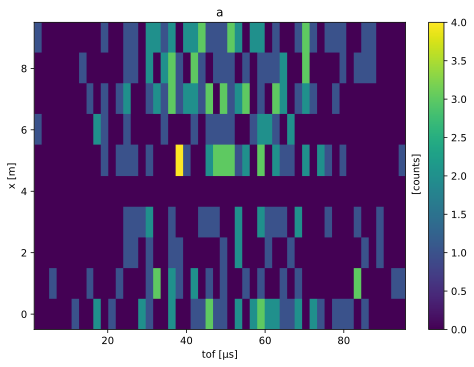

In [10]:
plot(d, bins={'tof': 50})

Alternatively, an array of bin edges can be specified:

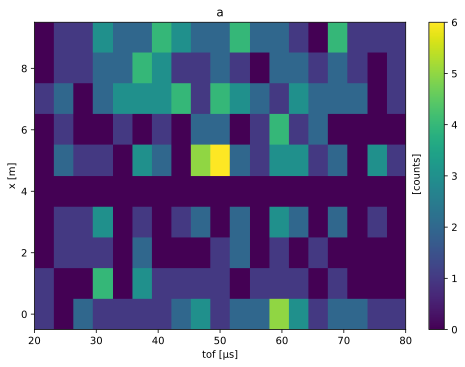

In [11]:
plot(d, bins={'tof': np.linspace(20, 80, num=20)})